# Example sandbox

In [23]:
a = T.nonzero(T.lt([2,2,2,5],[1,3,3,7]), True)

In [25]:
a[0].eval()

array([1, 2, 3])

In [22]:
T.nonzero?

### old stuff

In [1]:
# Importing and data
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib notebook



# Setting the extent
geo_data = GeMpy.import_data([0,10,0,10,0,10], [50,50,50])


# =========================
# DATA GENERATION IN PYTHON
# =========================
# Layers coordinates
layer_1 = np.array([[0.5,4,7], [2,4,6.5], [4,4,7], [5,4,6]])#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,4,5], [6,4,4],[8,4,4], [7,4,3], [1,4,6]])
layers = np.asarray([layer_1,layer_2])

# Foliations coordinates
dip_pos_1 = np.array([7,4,7])#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([2.,4,4])

# Dips
dip_angle_1 = float(15)
dip_angle_2 = float(340)
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")

# Azimuths
azimuths = np.asarray([90,90], dtype="float64")

# Polarity
polarity = np.asarray([1,1], dtype="float64")

# Setting foliations and interfaces values
GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :np.append(layer_1[:, 0],layer_2[:,0]),
            "Y" :np.append(layer_1[:, 1],layer_2[:,1]),
            "Z" :np.append(layer_1[:, 2],layer_2[:,2]),
            "formation" : np.append(
               np.tile("Layer 1", len(layer_1)), 
               np.tile("Layer 2", len(layer_2))),
            "labels" : [r'${\bf{x}}_{\alpha \, 0}^1$',
               r'${\bf{x}}_{\alpha \, 1}^1$',
               r'${\bf{x}}_{\alpha \, 2}^1$',
               r'${\bf{x}}_{\alpha \, 3}^1$',
               r'${\bf{x}}_{\alpha \, 0}^2$',
               r'${\bf{x}}_{\alpha \, 1}^2$',
               r'${\bf{x}}_{\alpha \, 2}^2$',
               r'${\bf{x}}_{\alpha \, 3}^2$',
               r'${\bf{x}}_{\alpha \, 4}^2$'] }))

GeMpy.set_foliations(geo_data,  pn.DataFrame(
    data = {"X" :np.append(dip_pos_1[0],dip_pos_2[0]),
            "Y" :np.append(dip_pos_1[ 1],dip_pos_2[1]),
            "Z" :np.append(dip_pos_1[ 2],dip_pos_2[2]),
            "azimuth" : azimuths,
            "dip" : dips_angles,
            "polarity" : polarity,
            "formation" : ["Layer 1", "Layer 2"],
            "labels" : [r'${\bf{x}}_{\beta \,{0}}$',
              r'${\bf{x}}_{\beta \,{1}}$'] })) 



layer_3 = np.array([[2,4,3], [8,4,2], [9,4,3]])
dip_pos_3 = np.array([1,4,1])
dip_angle_3 = float(80)
azimuth_3 = 90
polarity_3 = 1



GeMpy.set_interfaces(geo_data, pn.DataFrame(
    data = {"X" :layer_3[:, 0],
            "Y" :layer_3[:, 1],
            "Z" :layer_3[:, 2],
            "formation" : np.tile("Layer 3", len(layer_3)), 
            "labels" : [  r'${\bf{x}}_{\alpha \, 0}^3$',
                           r'${\bf{x}}_{\alpha \, 1}^3$',
                           r'${\bf{x}}_{\alpha \, 2}^3$'] }), append = True)
GeMpy.get_raw_data(geo_data,"interfaces")


GeMpy.set_foliations(geo_data, pn.DataFrame(data = {
                     "X" : dip_pos_3[0],
                     "Y" : dip_pos_3[1],
                     "Z" : dip_pos_3[2],
            
                     "azimuth" : azimuth_3,
                     "dip" : dip_angle_3,
                     "polarity" : polarity_3,
                     "formation" : [ 'Layer 3'],
                     "labels" : r'${\bf{x}}_{\beta \,{2}}$'}), append = True)


GeMpy.set_data_series(geo_data, {'younger': ('Layer 1', 'Layer 2'),
                      'older': 'Layer 3'}, order_series = ['younger', 'older'])

#GeMpy.plot_data(geo_data)

data_interp = GeMpy.set_interpolator(geo_data, u_grade = 0, compute_potential_field= False, compute_block_model = False,
                      verbose = 0)


In [2]:
input_data_T = data_interp.interpolator.tg.input_parameters_list()
input_data_P = data_interp.interpolator.data_prep() 
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(), on_unused_input='ignore',
                         #   mode='DebugMode', 
                            allow_input_downcast=True)

sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

yet cast __str__ = [1 1 1 ..., 1 1 1]


ValueError: could not broadcast input array from shape (48088) into shape (125000)
Apply node that caused the error: for{cpu,scan_fn}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, grade of the universal drift, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, matrix)>, <TensorType(float64, vector)>, final block init, Value of the formation, Position of the dips, Rest of the points of the layers, Reference points for every layer, Angle of every dip, Azimuth, Polarity)
Toposort index: 45
Inputs types: [TensorType(int64, scalar), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(float64, matrix), TensorType(int64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, vector), TensorType(float32, vector), TensorType(float32, vector)]
Inputs shapes: [(), (2,), (2,), (2,), (2,), (2,), (2,), (3, 125000), (), (), (), (), (125000, 3), (3,), (125000,), (4,), (3, 3), (9, 3), (9, 3), (3,), (3,), (3,)]
Inputs strides: [(), (8,), (8,), (8,), (8,), (8,), (8,), (1000000, 8), (), (), (), (), (8, 1000000), (8,), (8,), (8,), (4, 12), (4, 36), (12, 4), (4,), (4,), (4,)]
Inputs values: [array(2), array([0, 7]), array([7, 9]), array([0, 2]), array([2, 3]), array([0, 2]), array([2, 3]), 'not shown', array(0), array(1.0188534162169869), array(0.024715768660405354), array(0.01), 'not shown', array([ 3.,  4.,  2.]), 'not shown', array([ 3.,  2.,  1.,  0.]), 'not shown', 'not shown', 'not shown', array([  15.,  340.,   80.], dtype=float32), array([ 90.,  90.,  90.], dtype=float32), array([ 1.,  1.,  1.], dtype=float32)]
Inputs type_num: [7, 7, 7, 7, 7, 7, 7, 12, 7, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11]
Outputs clients: [[Subtensor{int64::}(for{cpu,scan_fn}.0, Constant{1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-c64b1a806318>", line 3, in <module>
    debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(), on_unused_input='ignore',
  File "../GeMpy/theanograf.py", line 760, in whole_block_model
    dict(input=theano.shared(np.insert([2, 1], 0, 0).cumsum()), taps=[0, 1])]

Debugprint of the apply node: 
for{cpu,scan_fn} [id A] <TensorType(float64, matrix)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Subtensor{int64} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Shape [id H] <TensorType(int64, vector)> ''   
 | | | | | | | |Subtensor{int64:int64:} [id I] <TensorType(int64, vector)> 'Length of interfaces in every series[1:]'   
 | | | | | | |Constant{0} [id J] <int64>
 | | | | | |Subtensor{int64} [id K] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id L] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id M] <TensorType(int64, vector)> 'Length of foliations in every series[1:]'   
 | | | | |   |Constant{0} [id N] <int64>
 | | | | |Subtensor{int64} [id O] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id P] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64:int64:} [id Q] <TensorType(int64, vector)> ''   
 | | | |   |   |Length of foliations in every series [id R] <TensorType(int64, vector)>
 | | | |   |   |Constant{0} [id S] <int64>
 | | | |   |   |Constant{-1} [id T] <int64>
 | | | |   |Constant{0} [id U] <int64>
 | | | |Subtensor{int64} [id V] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id W] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64::} [id X] <TensorType(int64, vector)> ''   
 | | |   |   |Length of foliations in every series [id R] <TensorType(int64, vector)>
 | | |   |   |Constant{1} [id Y] <int64>
 | | |   |Constant{0} [id Z] <int64>
 | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64:int64:} [id BC] <TensorType(int64, vector)> ''   
 | |   |   |<TensorType(int64, vector)> [id BD] <TensorType(int64, vector)>
 | |   |   |Constant{0} [id BE] <int64>
 | |   |   |Constant{-1} [id BF] <int64>
 | |   |Constant{0} [id BG] <int64>
 | |Subtensor{int64} [id BH] <TensorType(int64, scalar)> ''   
 |   |Shape [id BI] <TensorType(int64, vector)> ''   
 |   | |Subtensor{int64::} [id BJ] <TensorType(int64, vector)> ''   
 |   |   |<TensorType(int64, vector)> [id BD] <TensorType(int64, vector)>
 |   |   |Constant{1} [id BK] <int64>
 |   |Constant{0} [id BL] <int64>
 |Subtensor{:int64:} [id BM] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id I] <TensorType(int64, vector)> 'Length of interfaces in every series[1:]'   
 | |ScalarFromTensor [id BN] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id BO] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id M] <TensorType(int64, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id BP] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id BQ] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id Q] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BR] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id BS] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id X] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BT] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id BU] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id BC] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BV] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id BW] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id BJ] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BX] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id BY] <TensorType(float64, matrix)> ''   
 | |AllocEmpty{dtype='float64'} [id BZ] <TensorType(float64, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id CA] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id CC] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id CD] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id CE] <TensorType(float64, row)> ''   
 | | |   |     |final block init [id CF] <TensorType(float64, vector)>
 | | |   |Constant{0} [id CG] <int64>
 | | |Subtensor{int64} [id CH] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CI] <TensorType(int64, vector)> ''   
 | |   | |Rebroadcast{0} [id CD] <TensorType(float64, matrix)> ''   
 | |   |Constant{1} [id CJ] <int64>
 | |Rebroadcast{0} [id CD] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id CK] <int64> ''   
 |   |Subtensor{int64} [id CB] <TensorType(int64, scalar)> ''   
 |grade of the universal drift [id CL] <TensorType(int64, scalar)>
 |<TensorType(float64, scalar)> [id CM] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id CN] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id CO] <TensorType(float64, scalar)>
 |<TensorType(float64, matrix)> [id CP] <TensorType(float64, matrix)>
 |<TensorType(float64, vector)> [id CQ] <TensorType(float64, vector)>
 |final block init [id CF] <TensorType(float64, vector)>
 |Value of the formation [id CR] <TensorType(float64, vector)>
 |Position of the dips [id CS] <TensorType(float32, matrix)>
 |Rest of the points of the layers [id CT] <TensorType(float32, matrix)>
 |Reference points for every layer [id CU] <TensorType(float32, matrix)>
 |Angle of every dip [id CV] <TensorType(float32, vector)>
 |Azimuth [id CW] <TensorType(float32, vector)>
 |Polarity [id CX] <TensorType(float32, vector)>

Inner graphs of the scan ops:

for{cpu,scan_fn} [id A] <TensorType(float64, matrix)> ''   
 >Sum{axis=[0], acc_dtype=float64} [id CY] <TensorType(float64, vector)> 'The chunk of block model of a specific series'   

Storage map footprint:
 - <TensorType(float64, matrix)>, Shared Input, Shape: (125000, 3), ElemSize: 8 Byte(s), TotalSize: 3000000 Byte(s)
 - for{cpu,scan_fn}.0, Shape: (3, 125000), ElemSize: 8 Byte(s), TotalSize: 3000000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (3, 125000), ElemSize: 8 Byte(s), TotalSize: 3000000 Byte(s)
 - final block init, Shared Input, Shape: (125000,), ElemSize: 8 Byte(s), TotalSize: 1000000 Byte(s)
 - Rest of the points of the layers, Input, Shape: (9, 3), ElemSize: 4 Byte(s), TotalSize: 108 Byte(s)
 - Reference points for every layer, Input, Shape: (9, 3), ElemSize: 4 Byte(s), TotalSize: 108 Byte(s)
 - Position of the dips, Input, Shape: (3, 3), ElemSize: 4 Byte(s), TotalSize: 36 Byte(s)
 - Value of the formation, Shared Input, Shape: (4,), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Length of interfaces in every series, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - <TensorType(float64, vector)>, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Subtensor{:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Polarity, Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Azimuth, Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Angle of every dip, Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - grade of the universal drift, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 TotalSize: 10000696.0 Byte(s) 0.009 GB
 TotalSize inputs: 4000592.0 Byte(s) 0.004 GB



In [4]:
sol.shape

(62500,)

62500.0

In [8]:
data_interp.interpolator.tg.final_block

In [11]:
#a = T.squeeze(data_interp.interpolator.tg.final_block)
a = T.cast(data_interp.interpolator.tg.final_block, dtype = 'float32')

In [15]:
input_data_T = data_interp.interpolator.tg.input_parameters_list()
input_data_P = data_interp.interpolator.data_prep()
debugging = theano.function(input_data_T, a, on_unused_input='ignore',
                         #   mode='DebugMode', 
                            allow_input_downcast=True)

sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

In [17]:
sol

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]], dtype=float32)

In [5]:
tp = sol.reshape(50,50,50).T
plt.imshow(tp[:,5,:], origin='bottom', cmap='viridis', interpolation='None')

ValueError: total size of new array must be unchanged

<IPython.core.display.Javascript object>


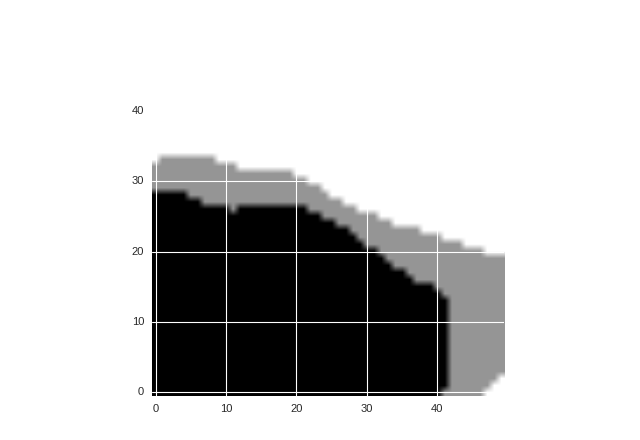

In [9]:
tp = sol[0][0].reshape(50,50,50).T
plt.imshow(tp[:,13,:], origin='bottom')

<IPython.core.display.Javascript object>


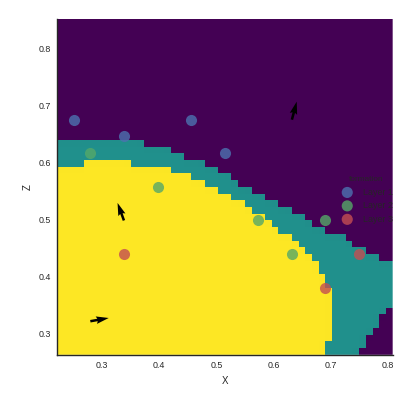

In [12]:
GeMpy.plot_section(data_interp, 4, block = sol[0][0], plot_data = True)

### Plot

<IPython.core.display.Javascript object>


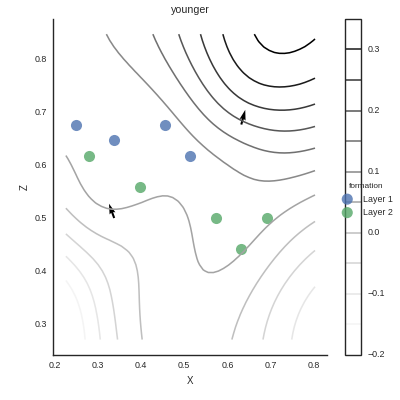

In [11]:
data_interp.interpolator.potential_fields = [sol.reshape(data_interp.resolution)]
GeMpy.plot_potential_field(data_interp, 13, origin = 'lower')
plt.colorbar()

In [9]:
sol

array([ 0.07121 ,  0.068339, -0.010725])

In [2]:
data_interp.interpolator._data_prep()
data_interp.interpolator._data_scaled.interfaces

,X,Y,Z,formation,formation number,labels,order_series,series
0,0.2501,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 0}^1$",0,younger
1,0.338335,0.5001,0.647159,Layer 1,0,"${\bf{x}}_{\alpha \, 1}^1$",0,younger
2,0.455982,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 2}^1$",0,younger
3,0.514806,0.5001,0.617747,Layer 1,0,"${\bf{x}}_{\alpha \, 3}^1$",0,younger
4,0.397159,0.5001,0.558924,Layer 2,1,"${\bf{x}}_{\alpha \, 0}^2$",0,younger
5,0.573629,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 1}^2$",0,younger
6,0.691276,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 2}^2$",0,younger
7,0.632453,0.5001,0.441276,Layer 2,1,"${\bf{x}}_{\alpha \, 3}^2$",0,younger
8,0.279512,0.5001,0.617747,Layer 2,1,"${\bf{x}}_{\alpha \, 4}^2$",0,younger
0,0.338335,0.5001,0.441276,Layer 3,2,"${\bf{x}}_{\alpha \, 0}^3$",1,older


In [6]:
a = data_interp.interpolator.len_interfaces
b = data_interp.interpolator._data_scaled.interfaces

In [26]:
b.iloc[c]

,X,Y,Z,formation,formation number,labels,order_series,series
0,0.2501,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 0}^1$",0,younger
4,0.397159,0.5001,0.558924,Layer 2,1,"${\bf{x}}_{\alpha \, 0}^2$",0,younger
0,0.338335,0.5001,0.441276,Layer 3,2,"${\bf{x}}_{\alpha \, 0}^3$",1,older


In [1]:
import theanograf as tg

ImportError: No module named 'theanograf'

### Theano testing

In [1]:
# Importing
import theano.tensor as T
import theano
import numpy as np
import sys, os
sys.path.append("../GeMpy")
import theanograf as tg


In [2]:
a = tg.TeanoGraph_pro(2)

In [5]:
a.universal_matrix()

The output file is available at graphs/universal_matrix_i.png
The output file is available at graphs/universal_matrix_g.png


(Drift interfaces, Drift foliations)

In [4]:
import theano
theano.printing.pydotprint(b, outfile="graphs/"+sys._getframe().f_code.co_name+".png", var_with_name_simple=True)  

The output file is available at graphs/cov_grad.png


In [10]:
def hola():
    return sys._getframe().f_code.co_name
hola()

<code object hola at 0x7f15721dcdb0, file "<ipython-input-10-a2bfdd16adfc>", line 1>

### ref

In [75]:
d = b.iloc[c][['X', 'Y', 'Z']].as_matrix()
e = np.zeros((0,3))
print(d)
for i in range(len(a)):
    print(i, a[i])
    e = np.vstack((e,np.tile(d[i], (a[i]-1, 1))))
e

[[0.2501 0.5001 0.6765705882352941]
 [0.3971588235294118 0.5001 0.5589235294117647]
 [0.33833529411764707 0.5001 0.44127647058823527]]
0 4
1 5
2 3


array([[0.2501, 0.5001, 0.6765705882352941],
       [0.2501, 0.5001, 0.6765705882352941],
       [0.2501, 0.5001, 0.6765705882352941],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.3971588235294118, 0.5001, 0.5589235294117647],
       [0.33833529411764707, 0.5001, 0.44127647058823527],
       [0.33833529411764707, 0.5001, 0.44127647058823527]], dtype=object)

### Rest

In [29]:
b.drop(c)

,X,Y,Z,formation,formation number,labels,order_series,series
1,0.338335,0.5001,0.647159,Layer 1,0,"${\bf{x}}_{\alpha \, 1}^1$",0,younger
2,0.455982,0.5001,0.676571,Layer 1,0,"${\bf{x}}_{\alpha \, 2}^1$",0,younger
3,0.514806,0.5001,0.617747,Layer 1,0,"${\bf{x}}_{\alpha \, 3}^1$",0,younger
5,0.573629,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 1}^2$",0,younger
6,0.691276,0.5001,0.5001,Layer 2,1,"${\bf{x}}_{\alpha \, 2}^2$",0,younger
7,0.632453,0.5001,0.441276,Layer 2,1,"${\bf{x}}_{\alpha \, 3}^2$",0,younger
8,0.279512,0.5001,0.617747,Layer 2,1,"${\bf{x}}_{\alpha \, 4}^2$",0,younger
1,0.691276,0.5001,0.382453,Layer 3,2,"${\bf{x}}_{\alpha \, 1}^3$",1,older
2,0.7501,0.5001,0.441276,Layer 3,2,"${\bf{x}}_{\alpha \, 2}^3$",1,older


In [72]:
a

array([4, 5, 3])

In [22]:
c = np.insert(a[:-1],0,0).cumsum()

In [23]:
c

array([0, 4, 9])

In [ ]:
c = np.add

In [4]:
ip_addresses = geo_data.interfaces["formation"].unique()
ip_dict = dict(zip(ip_addresses, range(len(ip_addresses)+1)))
ip_dict

{'Layer 1': 0, 'Layer 2': 1, 'Layer 3': 2}

In [7]:
#ip_addresses = df.source_ip.unique()
#ip_dict = dict(zip(ip_addresses, range(len(ip_addresses))))
geo_data.interfaces['formation number'] = geo_data.interfaces['formation'].replace(ip_dict)
geo_data.interfaces.coun

In [17]:
for i in geo_data.interfaces['formation number'].unique():
     print(np.sum(geo_data.interfaces['formation number'] == i))

4
5
3


In [ ]:
pn.sort

In [ ]:
GeMpy.plot_potential_field(geo_data, 2, n_pf = 0)

<IPython.core.display.Javascript object>


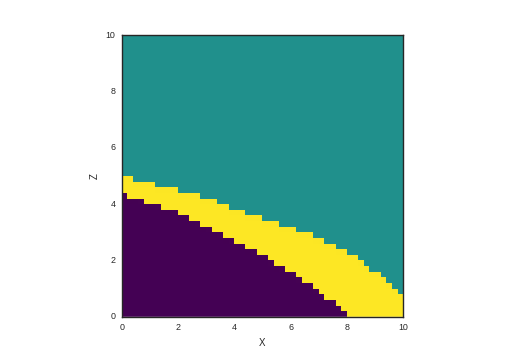

In [8]:
# GeMpy.set_interpolator(geo_data, u_grade = 0)
GeMpy.compute_block_model(geo_data, series_number= [0], verbose = 0)
GeMpy.plot_section(geo_data, 13)
#plt.imshow(geo_data.interpolator.tg.final_block.get_value().reshape(50,50,50)[:,2,:].T, origin = 'bottom')

In [8]:
geo_data.interpolator._grid_scaled.grid

array([[ 0.0001  ,  0.0001  ,  0.0001  ],
       [ 0.0001  ,  0.0001  ,  0.02411 ],
       [ 0.0001  ,  0.0001  ,  0.048119],
       ..., 
       [ 1.176571,  1.176571,  1.128551],
       [ 1.176571,  1.176571,  1.152561],
       [ 1.176571,  1.176571,  1.176571]], dtype=float32)

In [6]:
scaled = geo_data.interpolator._data_scaled

In [9]:
import theano.tensor as T
a = T.vector('polla')
a.eval?

<IPython.core.display.Javascript object>


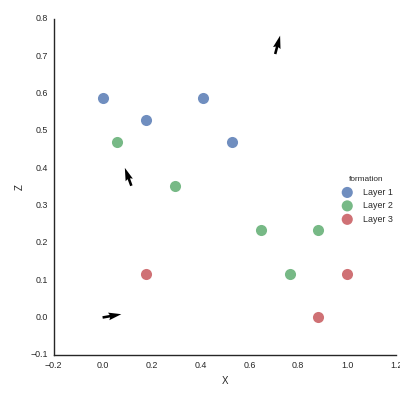

In [7]:
%matplotlib notebook
GeMpy.plot_data(scaled)

In [17]:
geo_data.interpolator.tg.final_block.get_value().reshape(50,50,50);

In [20]:
plt.imshow(geo_data.interpolator.tg.final_block.get_value().reshape(50,50,50)[:,2,:].T, origin = 'bottom')

In [4]:
import pymc as pm

inter = geo_data.interpolator._data.interfaces

Z_unc = pm.Normal('Z_unc', inter['Z'], 1./np.square(1))

@pm.deterministic
def model(value=0, Z_unc = Z_unc):
    geo_data.interpolator._data.interfaces['Z'] = pn.DataFrame(Z_unc)
    GeMpy.compute_block_model(geo_data, u_grade = 0)
   # print(geo_data.interpolator._data.interfaces)
    return geo_data.interpolator.block.get_value()

pymc_model = pm.Model([Z_unc, model])

In [5]:
M = pm.MCMC(pymc_model)

In [6]:
M.sample(4)

 [---------------------125%----------------------] 5 of 4 complete in 2.1 sec

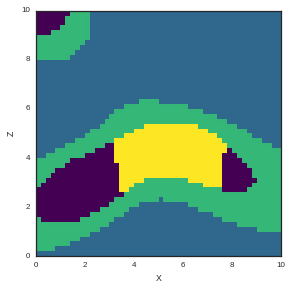

In [7]:
GeMpy.plot_section(geo_data, 13, block = M.trace('model')()[2])